<a href="https://colab.research.google.com/github/lazic7/MSAP/blob/master/LV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


**Korak 1: Učitavanje i čišćenje podataka**

In [ ]:
#Učitavanje i čišćenje podataka
df = pd.read_csv('hormon.csv', sep=";", decimal=",").convert_dtypes()
df.head()

,spol,gastrS,somatS,somatZ,pusenje,alkohol,kava,CLOtest,"dijagnoza,,,"
0,z,92.3,3.1,29.31,1,0,1,1,G
1,z,49.5,8.5,5.52,0,0,1,1,G
2,z,40.5,16.2,15.22,1,0,1,0,G
3,z,42.7,16.0,3.67,0,0,1,0,"G,"
4,z,48.2,16.0,66.97,1,0,1,0,"G,"


Učitani csv je slika hormona pusaca, alkoholicara i ljubaca kave

In [ ]:
df.info()
print("Shape: ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spol          82 non-null     string 
 1   gastrS        78 non-null     Float64
 2   somatS        77 non-null     Float64
 3   somatZ        81 non-null     Float64
 4   pusenje       82 non-null     Int64  
 5   alkohol       82 non-null     Int64  
 6   kava          82 non-null     Int64  
 7   CLOtest       82 non-null     Int64  
 8   dijagnoza,,,  82 non-null     string 
dtypes: Float64(3), Int64(4), string(2)
memory usage: 6.5 KB
Shape:  (82, 9)


In [ ]:
df['gastrS'] = df['gastrS'].fillna(df['gastrS'].median())
df['somatS'] = df['somatS'].fillna(df['somatS'].median())
df['somatZ'] = df['somatZ'].fillna(df['somatZ'].median())
df.isnull().sum()

,0
spol,0
gastrS,0
somatS,0
somatZ,0
pusenje,0
alkohol,0
kava,0
CLOtest,0
"dijagnoza,,,",0


Bilo je praznih vrijednosti u kolonama gastrS, somatS i somatZ koje sam popunio medianom

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
sample_size = 82

Na osnovu funkcije shape mozemo vidjeti da je velicina uzorka 82.

***Korak 2: Eksplorativna i Deskriptivna statistika\***

In [ ]:
df_selected=df[["somatS"]]
df_selected.describe()

,somatS
count,82.0
mean,20.527073
std,31.833874
min,2.34
25%,6.84
50%,11.05
75%,16.175
max,231.0


In [ ]:
df_selected.median() #sredisnja vrijednost

,0
somatS,11.05


In [ ]:
df_selected.mode() #najcese ponavljana vrijednost

,somatS
0,11.05


In [ ]:
df_selected.std() #standardna devijacija

,0
somatS,31.833874


In [ ]:
df_selected.max() - df_selected.min() #raspon

,0
somatS,228.66


In [ ]:
shape_measures = pd.DataFrame({
    "Skewness": df_selected.skew(),
    "Kurtosis": df_selected.kurtosis()
})
shape_measures

,Skewness,Kurtosis
somatS,4.516282,25.040394


Funkcija somatS je blago nagnuta u desno jer je Skewness pozitivan.

Funkcija somatS je šiljasta, nije normalno distribuirana, Kurtosis je pozitivan

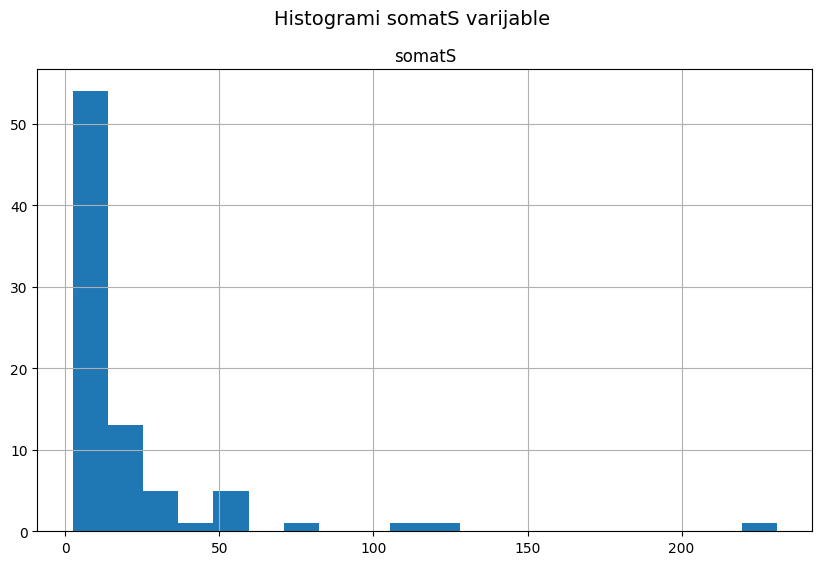

In [ ]:
df_selected.hist(bins=20, figsize=(10,6))
plt.suptitle("Histogrami somatS varijable", fontsize=14)
plt.show()

Na histogramu vidimo da funkcija nije normalno distribuirana

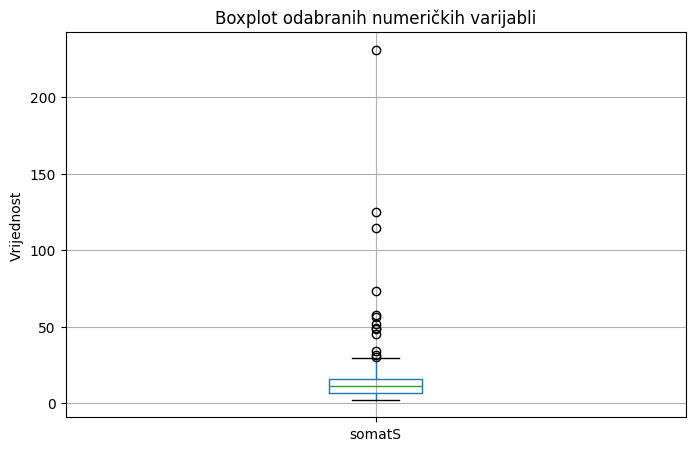

In [ ]:
plt.figure(figsize=(8,5))
df_selected.boxplot()
plt.title("Boxplot odabranih numeričkih varijabli")
plt.ylabel("Vrijednost")
plt.show()

Primjecujemo da ima dovoljno ekstrema

**Korak 3: Statistika zaključivanja**

In [ ]:
from scipy.stats import shapiro
stat, p_value = shapiro(df_selected)
print(f"Shapiro-Wilk statistika: {stat}, P-vrijednost: {p_value}")

Shapiro-Wilk statistika: 0.49047063509188693, P-vrijednost: 2.186005764291415e-15


P je < 0.05. Hipoteza H0 se zaista odbacuje, podatci nisu normalno distribuirani

In [ ]:
import numpy as np
import scipy.stats as st

# Podaci zadatka
n = 82  # veličina uzorka
x_mean = df_selected.mean() # aritmetička sredina uzorka
s = df_selected.std(ddof=1)  # korigirana uzoračka st.dev.
gamma = 0.95  # razina pouzdanosti (γ = 0.95)

# Izračunavanje standardne devijacije uzorka
#s = np.sqrt(s_squared)

# Izračunavanje standardne pogreške (SE)
SE = s / np.sqrt(n)

# Kritična vrijednost za t-distribuciju s n-1 stupnjeva slobode
t_critical = st.t.ppf((1 + gamma) / 2, df=n-1)

# Izračunavanje intervala povjerenja
lower_bound = x_mean - t_critical * SE
upper_bound = x_mean + t_critical * SE

# Prikaz rezultata
interval_povjerenja = (lower_bound, upper_bound)
print(f"Interval povjerenja za očekivanje s pouzdanošću γ = {gamma}: {interval_povjerenja}")

Interval povjerenja za očekivanje s pouzdanošću γ = 0.95: (somatS    13.532404
dtype: Float64, somatS    27.521742
dtype: Float64)


Interval procjene govori nam raspon unutar kojeg se vjerojatno nalazi stvarna vrijednost populacijskog parametra, uz određenu razinu pouzdanosti.
somatS sa 95% pouzdanoscu se nalazi u intervalu 13.53 - 27.52

In [ ]:
total_male_smoking = len(df[(df['spol'] == 'm') & (df['pusenje'] == 1)])
total_male_nonsmoking = len(df[(df['spol'] == 'm') & (df['pusenje'] == 0)])
total_female_smoking = len(df[(df['spol'] == 'z') & (df['pusenje'] == 1)])
total_female_nonsmoking = len(df[(df['spol'] == 'z') & (df['pusenje'] == 0)])

data = [[total_male_smoking, total_male_nonsmoking], [total_female_smoking, total_female_nonsmoking]]


chi2, p, dof, expected = chi2_contingency(data)
print(f"Chi-square statistika: {chi2:.3f}")
print(f"P-vrijednost: {p:.4f}")
print(f"Stupnjevi slobode: {dof}")
print("Očekivane frekvencije:\n", expected)

if p < 0.05:
    print("Odbacujemo nul hipotezu → postoji značajna razlika u pušenju s obzirom na spol.")
else:
    print("Ne odbacujemo nul hipotezu → nema značajne razlike u pušenju između muškaraca i žena.")



Chi-square statistika: 3.920
P-vrijednost: 0.0477
Stupnjevi slobode: 1
Očekivane frekvencije:
 [[19.02439024 20.97560976]
 [19.97560976 22.02439024]]
Odbacujemo nul hipotezu → postoji značajna razlika u pušenju s obzirom na spol.


**Zaključak**

Dataset predstavlja sliku hormona osoba sa razlicitim navikama.

Redci nisu brisani nego su popunjavani medianom

Uzorak je velicine 82

Izračunom Skwness i Kurtosis utvrdjeno je da podatci stomatS nisu normalno distribuirani. Provjerom normalnosti Shapiro-Wilk odbacena je hipoteza da podatci nisu normalno distribuirani

U izračunu intervalne procjene, s 95% pouzdanoscu mozemo utvrditi da se vrijednost somatS nalazi u intervalu 13.53 - 27.52.